In [15]:
import agent
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils

### Environnement

In [2]:
env = gym.make('MountainCar-v0')

### Agent

In [3]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'epsilon': 0.000001,
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 10,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
sarsa_agent = agent.SarsaAgent(agent_init)

### RUN

In [4]:
timesteps_per_episode = list()
rewards_per_episode = list()
epoch_size = 20
n_episode = 2000
t_max_per_episode = 200
verbose = False
graphical = False

In [5]:
assert n_episode % epoch_size == 0, f"epoch_size ({epoch_size}) must be a divisor of n_episode ({n_episode})"

for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            env.render()
            
        state, reward, done, info = env.step(sarsa_agent.next_action)
        reward = sarsa_agent.max_position_reward_function(state[0], reward)
        next_action = sarsa_agent.update(state, reward, done)
        
        rewards += reward
        if done:
            break
            
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    
env.close()

100%|██████████| 2000/2000 [00:26<00:00, 74.23it/s]


### ANALYSIS

In [6]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.min()

82

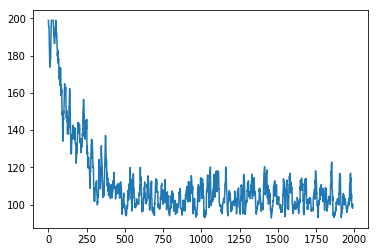

In [16]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=10)
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)

In [7]:
timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0)

array([110.35, 117.95, 106.9 , 109.75, 122.8 , 112.35, 114.6 , 109.7 ,
       114.35, 117.3 , 112.25, 116.65, 113.65, 113.4 , 116.  , 114.8 ,
       116.2 , 110.45, 108.15, 110.55, 111.7 , 114.85, 109.25, 114.1 ,
       108.6 , 106.5 , 102.05, 105.85, 116.7 , 111.35, 116.6 , 113.7 ,
       112.95, 114.  , 117.85, 116.25, 106.7 , 116.2 , 111.9 , 114.35,
       103.1 , 119.45, 118.85, 117.5 , 114.45, 110.35, 123.9 , 112.45,
       107.55, 111.75, 111.2 , 106.9 , 117.05, 120.2 , 113.  , 119.4 ,
       113.7 , 114.8 , 100.45, 116.5 , 117.1 , 108.45, 111.1 , 120.45,
       115.05, 106.9 , 105.85, 111.55, 109.45, 110.85, 105.35, 106.95,
       101.8 , 104.75, 108.8 , 115.35, 105.9 , 111.5 , 107.85, 111.55,
       110.6 , 116.1 , 107.65, 121.65, 109.5 , 113.8 , 110.1 , 116.8 ,
       106.85, 112.75, 104.7 ,  99.5 , 111.9 , 115.65, 109.4 , 110.2 ,
       101.35, 104.8 , 105.45, 107.8 ])

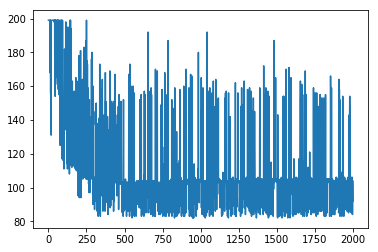

In [8]:
plt.plot(range(n_episode), timesteps_per_episode)

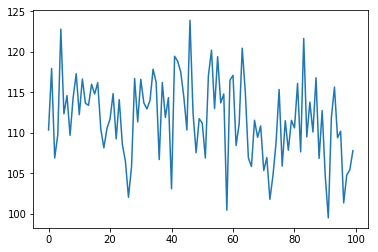

In [9]:
plt.plot(range(int(n_episode/epoch_size)), timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0))

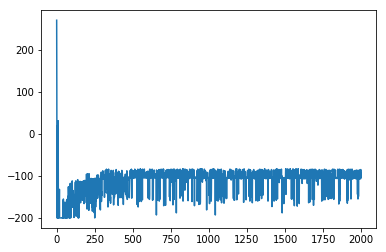

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)

Rolling Average

In [12]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=10)

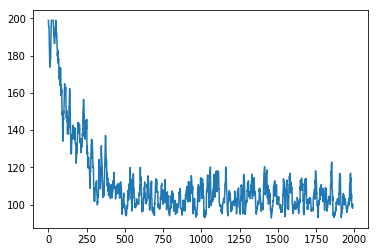

In [13]:
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)